In [43]:
import keras
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

In [44]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(url, header=None, names=columns)
df = df.dropna()
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [45]:
# Split target and values
X = df.iloc[:, 0:4].values
y = df['species'].values

In [46]:
# change labels to numerical values
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# make vector from categories
y_categorical = keras.utils.to_categorical(y_encoded)

# scale values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split data set and ensure that test and train set have same amount of targets and also suffle data.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42,
                                                    shuffle=True, stratify=y)
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (120, 4)
Test data shape: (30, 4)
Training labels shape: (120, 3)
Test labels shape: (30, 3)


# Building the neural network


In [47]:
model = keras.Sequential([
    keras.Input(shape=(4,)),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
I noticed that i  batch size is raised over 8, models starts to perform poorly

In [48]:
model_data = model.fit(X_train, y_train, epochs=90, batch_size=8, validation_split=0.1)
score = model.evaluate(X_test, y_test, verbose=1)


Epoch 1/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.3333 - loss: 1.0457 - val_accuracy: 0.5000 - val_loss: 0.9191
Epoch 2/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3889 - loss: 0.9757 - val_accuracy: 0.5000 - val_loss: 0.8591
Epoch 3/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4815 - loss: 0.9154 - val_accuracy: 0.5833 - val_loss: 0.8045
Epoch 4/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5278 - loss: 0.8612 - val_accuracy: 0.5833 - val_loss: 0.7623
Epoch 5/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5648 - loss: 0.8171 - val_accuracy: 0.5833 - val_loss: 0.7260
Epoch 6/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6204 - loss: 0.7781 - val_accuracy: 0.6667 - val_loss: 0.6973
Epoch 7/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6574 - loss: 0.7444 - val_accuracy: 0.7500 - val_loss: 0.6743
Epoch 8/90
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6759 - loss: 0.7153 - val_accuracy: 0.8333 - val_loss

# Plot the results
 I noticed that 12 neurons and 90 epocs was an optimal to get over 95 % accuracy. If neurons are raised it won affect to results anymore. If epocs are decreased  model starts to perform poorly.

| Metric                  | Data used                                                             | What it tells you                                                                                           |
| ----------------------- | --------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------- |
| **Training accuracy**   | The data the model was **trained on** (`X_train`, `y_train`)          | How well the model learned patterns **from known examples**                                                 |
| **Validation accuracy** | A held-out portion of the training data (your `validation_split=0.1`) | How well the model performs on **unseen data during training** (used to tune epochs and detect overfitting) |
| **Test accuracy**       | The completely **separate test set** (`X_test`, `y_test`)             | How well the model generalizes to **new, never-before-seen data**                                           |


In well trained model:
Training accuracy  ≥  Validation accuracy  ≈  Test accuracy

In this case validation accuracy is 1 because dataset size is so small and validation set is 0.1 from it. Thats why model performs so well on that.

Test loss: 0.20061855018138885
Test accuracy: 0.9333333373069763
Final training accuracy: 0.9722222089767456
Final validation accuracy: 1.0


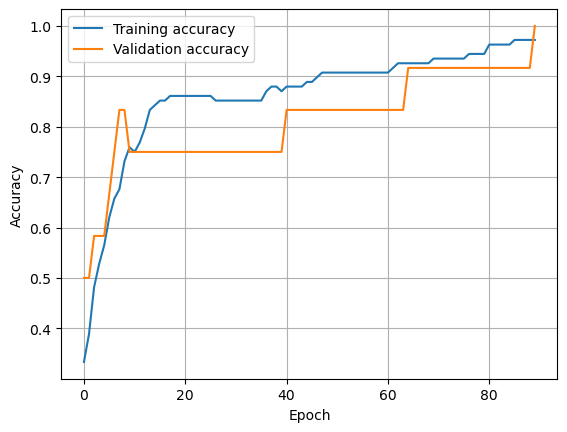

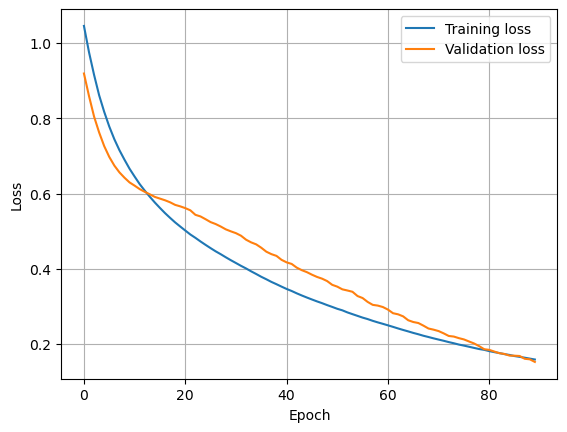

In [49]:

print("Test loss:", score[0])
print("Test accuracy:", score[1])

print("Final training accuracy:", model_data.history['accuracy'][-1])
print("Final validation accuracy:", model_data.history['val_accuracy'][-1])


plt.plot(model_data.history['accuracy'],label= 'Training accuracy')
plt.plot(model_data.history['val_accuracy'],label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


plt.plot(model_data.history['loss'],label= 'Training loss')
plt.plot(model_data.history['val_loss'],label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
